In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,LassoCV,Ridge,ElasticNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
path='/content/drive/MyDrive/Dataset/insurance.csv'
data = pd.read_csv(path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Xử lý giá trị trùng lặp
dups = data.duplicated()
print('Kết quả',dups.any())
print('Số dữ liệu trùng lặp',dups.any().sum())
print('Dữ liệu bị lặp')
print(data[dups])
#xóa
data.drop_duplicates(inplace=True)
data.shape

Kết quả True
Số dữ liệu trùng lặp 1
Dữ liệu bị lặp
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


(1337, 7)

In [7]:
#Kiểm tra giá trị Null
null = data.isna().any(axis=1)
print('Số hàng bị Null',null.sum())
print('Dữ liệu bị Null',data[null])


Số hàng bị Null 0
Dữ liệu bị Null Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


#Trực quan hóa dữ liệu

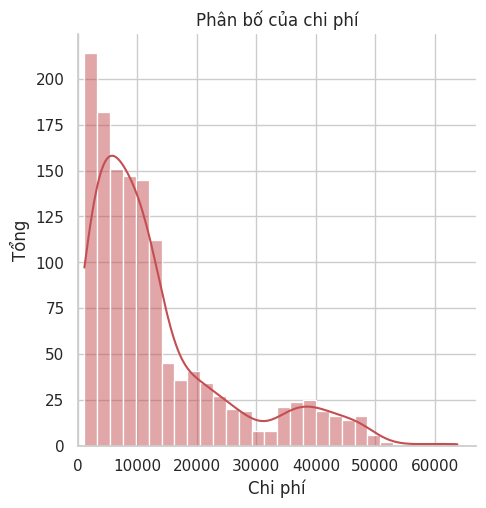

In [8]:
sns.set(style='whitegrid')
ax = sns.displot((data['charges']) , kde=True ,color='r')
plt.xlim(0)
plt.xlabel('Chi phí')
plt.ylabel('Tổng')
plt.title('Phân bố của chi phí')
plt.show()

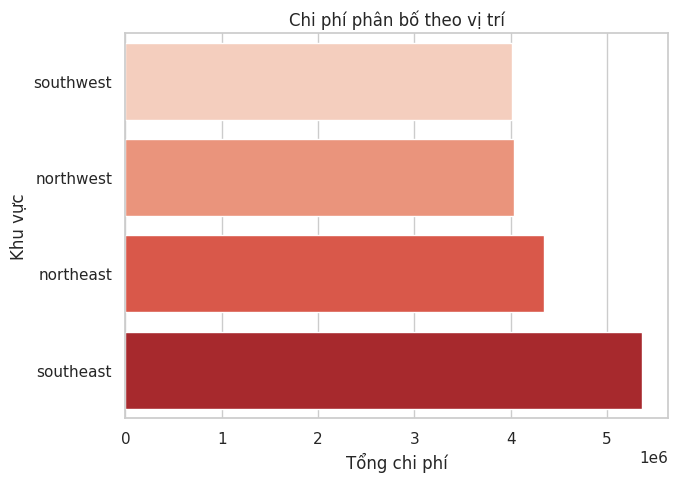

In [9]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
ax = plt.subplots(1, 1, figsize=(7, 5))
ax = sns.barplot( x= charges , y=charges.index, palette='Reds')
plt.xlabel('Tổng chi phí')
plt.ylabel('Khu vực')
plt.title('Chi phí phân bố theo vị trí')
plt.show()

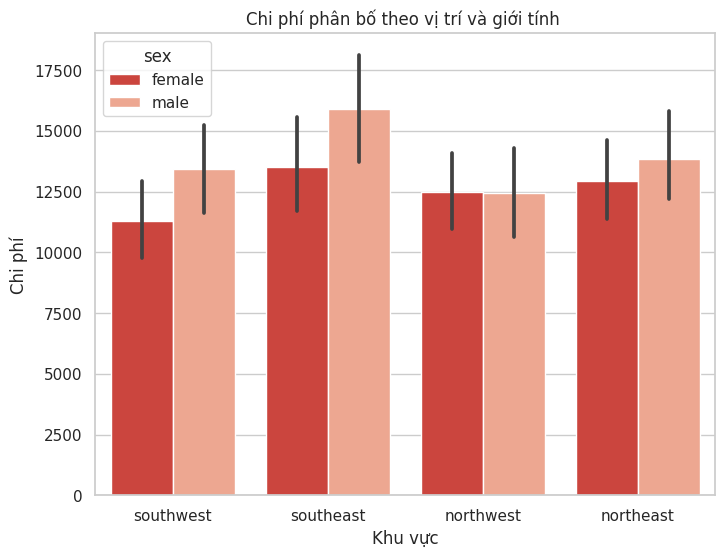

In [10]:
ax = plt.subplots(1,1,figsize=(8,6))
ax = sns.barplot(x=data['region'], y=data['charges'], hue='sex', data=data, palette='Reds_r')
plt.xlabel('Khu vực')
plt.ylabel('Chi phí')
plt.title('Chi phí phân bố theo vị trí và giới tính ')
plt.show()

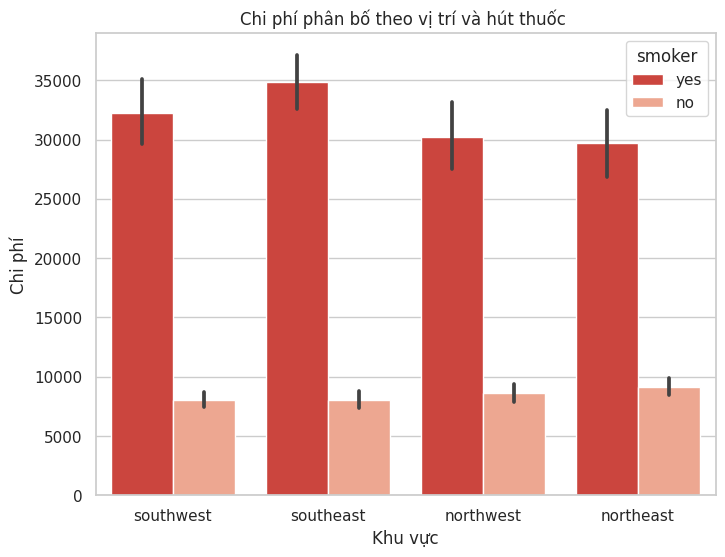

In [11]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax = sns.barplot(x=data['region'], y=data['charges'], hue='smoker', data=data, palette='Reds_r')
plt.xlabel('Khu vực')
plt.ylabel('Chi phí')
plt.title('Chi phí phân bố theo vị trí và hút thuốc ')
plt.show()

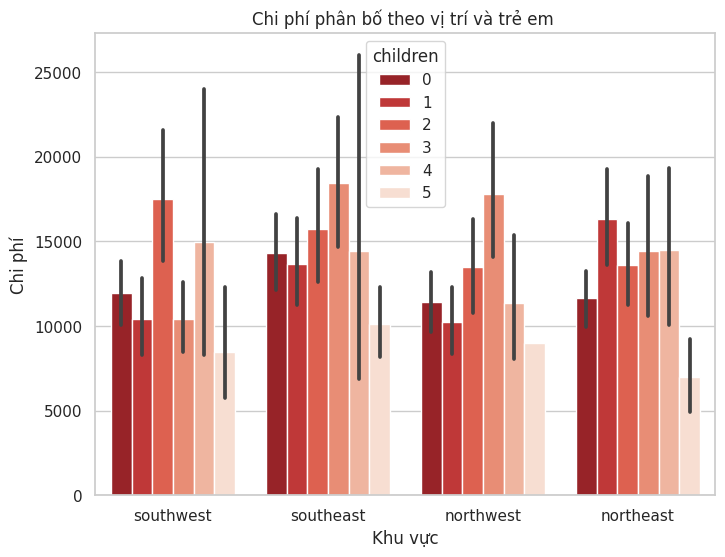

In [12]:
ax = plt.subplots(1,1,figsize=(8,6))
ax = sns.barplot(x=data['region'], y=data['charges'], hue='children', data=data, palette='Reds_r')
plt.xlabel('Khu vực')
plt.ylabel('Chi phí')
plt.title('Chi phí phân bố theo vị trí và trẻ em ')
plt.show()

Text(0.5, 1.0, 'Chi phí phân bố theo tuổi và hút thuốc ')

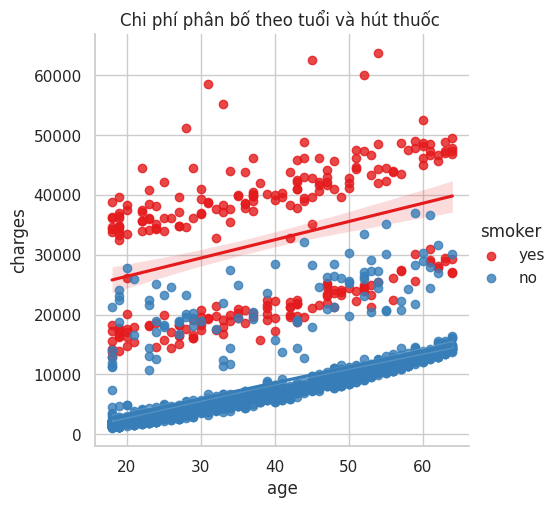

In [13]:
ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette='Set1')
plt.title('Chi phí phân bố theo tuổi và hút thuốc ')

Text(0.5, 1.0, 'Chi phí phân bố theo bmi và hút thuốc ')

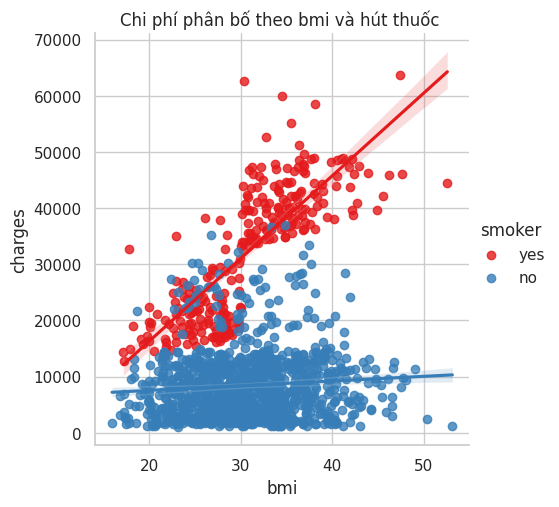

In [14]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette='Set1')
plt.title('Chi phí phân bố theo bmi và hút thuốc ')

Text(0.5, 1.0, 'Chi phí phân bố theo children và hút thuốc ')

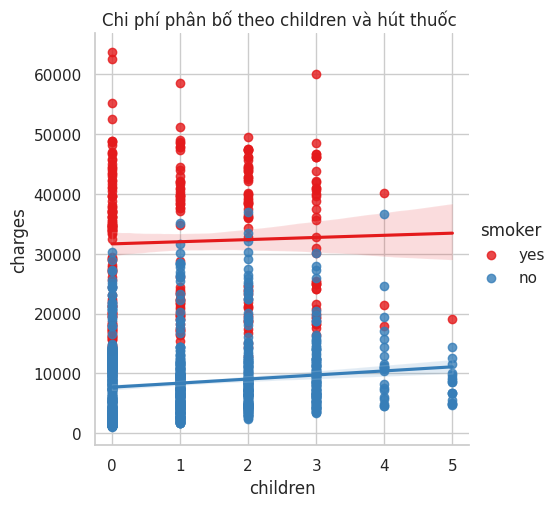

In [15]:
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette='Set1')
plt.title('Chi phí phân bố theo children và hút thuốc ')

In [16]:
#Chuyển sex','smoker','region' thành kiểu số sử dụng LabelEncoder
LB =LabelEncoder()
#sex
data['sex']=LB.fit_transform(data['sex'])
#smoker
data['smoker']=LB.fit_transform(data['smoker'])
#region
data['region']=LB.fit_transform(data['region'])

data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

<Axes: >

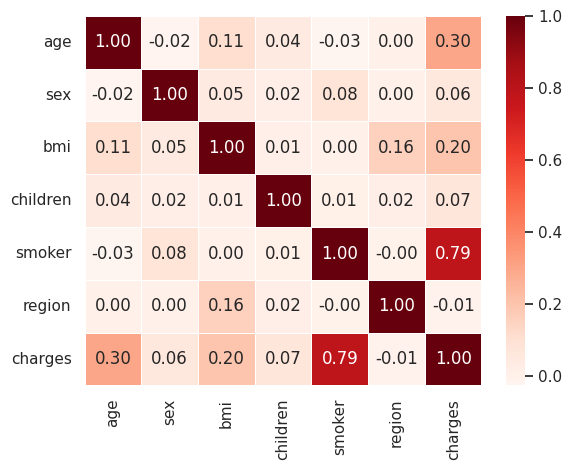

In [17]:
sns.heatmap(data.corr(),annot=True,fmt=".2f", linewidths=.5, cmap='Reds')

#Thực hiện train dữ liệu

In [18]:
#hàm đánh giá hiệu suất mô hình
def print_hieusuatmohinh(x,y):
  mae=metrics.mean_absolute_error(x,y)
  mse=metrics.mean_squared_error(x,y)
  rmse=np.sqrt(mse)
  r2 = metrics.r2_score(x,y)
  print('--------------------------')
  print('MAE',mae)
  print('MSE',mse)
  print('RMSE',rmse)
  print("R2",r2)


def hieusuatmohinh(x,y):
  mae=metrics.mean_absolute_error(x,y)
  mse=metrics.mean_squared_error(x,y)
  rmse=np.sqrt(mse)
  r2 = metrics.r2_score(x,y)
  return mae,mse,rmse,r2


In [19]:
#cắt data
x=data.drop(['charges'],axis=1).values
y=data['charges'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [20]:
#  MultiLinearRegression
MultiLinearRegression =LinearRegression()
MultiLinearRegression.fit(x_train,y_train)
y_dudoan =MultiLinearRegression.predict(x_test)
print("m",MultiLinearRegression.coef_)
print("b",MultiLinearRegression.intercept_)
print_hieusuatmohinh(y_test,y_dudoan)

results_df = pd.DataFrame(data=[["Multivariate Regression",*hieusuatmohinh(y_test,y_dudoan)]],
                          columns=['Model', 'MAE','MSE', 'RMSE', 'R2 Square'])

m [  248.76407134   -99.69539417   312.60904469   534.12087654
 23052.15275173  -237.62514748]
b -11047.686556720215
--------------------------
MAE 4182.353155288298
MSE 35493102.611650534
RMSE 5957.608799816461
R2 0.8068466322629111


In [21]:
#Ridge Regression
Ridge =Ridge( alpha = 0.5,random_state=42,solver='cholesky', tol=0.0001)
Ridge.fit(x_train,y_train)
y_dudoan =Ridge.predict(x_test)
print("m",Ridge.coef_)
print("b",Ridge.intercept_)
print_hieusuatmohinh(y_test,y_dudoan)

results_df2 = pd.DataFrame(data=[["Ridge Regression",*hieusuatmohinh(y_test,y_dudoan)]],
                          columns=['Model', 'MAE','MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df2,ignore_index=True)

m [  248.69649901   -94.97669301   312.51354186   534.39442373
 22984.38201707  -237.4991625 ]
b -11031.471112859788
--------------------------
MAE 4190.301452202516
MSE 35579592.08055706
RMSE 5964.863123371488
R2 0.8063759568087003


<ipython-input-21-87dc11e23e3e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2,ignore_index=True)


In [22]:
#Lasso Regression
Lasso = LassoCV(alphas=[0.2], fit_intercept=True, precompute = False, max_iter = 1000,
              tol=0.0001, positive=False, random_state=42, selection='cyclic')

Lasso.fit(x_train,y_train)
y_dudoan =Lasso.predict(x_test)
print("m",Lasso.coef_)
print("b",Lasso.intercept_)
print_hieusuatmohinh(y_test,y_dudoan)

results_df2 = pd.DataFrame(data=[["Lasso Regression",*hieusuatmohinh(y_test,y_dudoan)]],
                          columns=['Model', 'MAE','MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df2,ignore_index=True)

m [  248.76394274   -98.78897496   312.5935338    533.99201688
 23050.81271475  -237.44353757]
b -11047.543619099295
--------------------------
MAE 4182.493101891228
MSE 35494962.65256335
RMSE 5957.764904103161
R2 0.8068365099253298


<ipython-input-22-e56faac7c29a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2,ignore_index=True)


In [23]:
#ElasticNet
ElasticNet = ElasticNet(alpha=0.1,l1_ratio=0.9,selection='random',random_state=42)

ElasticNet.fit(x_train,y_train)
y_dudoan =ElasticNet.predict(x_test)
print("m",ElasticNet.coef_)
print("b",ElasticNet.intercept_)
print_hieusuatmohinh(y_test,y_dudoan)

results_df2 = pd.DataFrame(data=[["ElasticNet",*hieusuatmohinh(y_test,y_dudoan)]],
                          columns=['Model', 'MAE','MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df2,ignore_index=True)

m [ 2.47398123e+02 -7.42355191e+00  3.10682635e+02  5.39334044e+02
  2.16848902e+04 -2.34952881e+02]
b -10718.810046022336
--------------------------
MAE 4350.933622151564
MSE 37549945.4545204
RMSE 6127.80102928615
R2 0.7956532991144071


<ipython-input-23-63ad3a16d72d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2,ignore_index=True)


In [24]:
#Artficial Neural Network

model = Sequential()

model.add(Dense(x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

r = model.fit(x_train, y_train,
              validation_data=(x_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
1069/1069 [==============================] - 17s 13ms/step - loss: 141246208.0000 - val_loss: 155881744.0000
Epoch 2/100
1069/1069 [==============================] - 12s 11ms/step - loss: 121604992.0000 - val_loss: 173312176.0000
Epoch 3/100
1069/1069 [==============================] - 6s 5ms/step - loss: 119947248.0000 - val_loss: 144692752.0000
Epoch 4/100
1069/1069 [==============================] - 4s 4ms/step - loss: 108714080.0000 - val_loss: 124260064.0000
Epoch 5/100
1069/1069 [==============================] - 6s 5ms/step - loss: 69108704.0000 - val_loss: 66913832.0000
Epoch 6/100
1069/1069 [==============================] - 4s 4ms/step - loss: 45399724.0000 - val_loss: 40735364.0000
Epoch 7/100
1069/1069 [==============================] - 4s 3ms/step - loss: 40580860.0000 - val_loss: 40520088.0000
Epoch 8/100
1069/1069 [==============================] - 4s 4ms/step - loss: 38657276.0000 - val_loss: 37857308.0000
Epoch 9/100
1069/1069 [=============================

In [25]:
y_dudoan = model.predict(x_test)
print_hieusuatmohinh(y_test,y_dudoan)

results_df2 = pd.DataFrame(data=[["Artficial Neural Network",*hieusuatmohinh(y_test,y_dudoan)]],
                          columns=['Model', 'MAE','MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df2,ignore_index=True)

9/9 [==============================] - 0s 3ms/step
--------------------------
MAE 2606.793763490905
MSE 17904354.12384993
RMSE 4231.353698741093
R2 0.902564553625586


<ipython-input-25-18538af5f516>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2,ignore_index=True)


In [26]:
#Random Forest Regressor
RandomForestRegressor = RandomForestRegressor(n_estimators=1000)
RandomForestRegressor.fit(x_train,y_train)

y_dudoan = RandomForestRegressor.predict(x_test)
print_hieusuatmohinh(y_test,y_dudoan)

results_df2 = pd.DataFrame(data=[["Random Forest Regressor",*hieusuatmohinh(y_test,y_dudoan)]],
                          columns=['Model', 'MAE','MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df2,ignore_index=True)

--------------------------
MAE 2565.239245119773
MSE 21501129.25018774
RMSE 4636.931016328336
R2 0.882990913184891


<ipython-input-26-7dc705a37275>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2,ignore_index=True)


In [27]:
#Support Vector Machine
SupportVectorMachine = SVR(kernel='rbf', C=1000000, epsilon=0.001)
SupportVectorMachine.fit(x_train, y_train)

y_dudoan = SupportVectorMachine.predict(x_test)
print_hieusuatmohinh(y_test,y_dudoan)

results_df2 = pd.DataFrame(data=[["Support Vector Machine",*hieusuatmohinh(y_test,y_dudoan)]],
                          columns=['Model', 'MAE','MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df2,ignore_index=True)

--------------------------
MAE 2748.173788849654
MSE 35638873.77196404
RMSE 5969.830296747475
R2 0.8060533460055339


<ipython-input-27-864234d6c567>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df2,ignore_index=True)


In [28]:
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Multivariate Regression,4182.353155,3.549310e+07,5957.608800,0.806847
1,Ridge Regression,4190.301452,3.557959e+07,5964.863123,0.806376
2,Lasso Regression,4182.493102,3.549496e+07,5957.764904,0.806837
3,ElasticNet,4350.933622,3.754995e+07,6127.801029,0.795653
4,Artficial Neural Network,2606.793763,1.790435e+07,4231.353699,0.902565
5,Random Forest Regressor,2565.239245,2.150113e+07,4636.931016,0.882991
6,Support Vector Machine,2748.173789,3.563887e+07,5969.830297,0.806053


<Axes: ylabel='Model'>

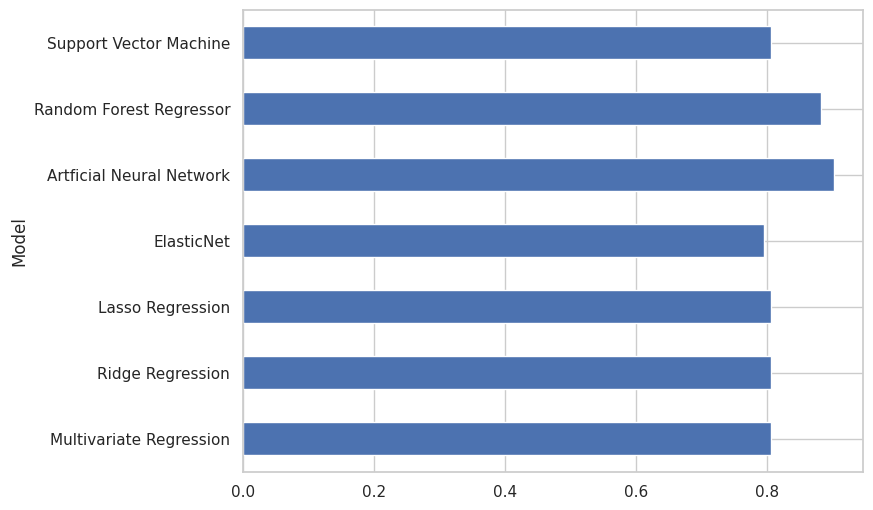

In [29]:
results_df.set_index('Model',inplace=True)
results_df['R2 Square'].plot(kind='barh',figsize=(8,6))

Chúng ta nhận thấy mô hình ANN cho ra hiệu suất cao nhất ta sẽ dùng nó để dự đoán chi phí của bảo hiểm

In [30]:
print("Dự đoán chi phí bảo hiểm y tế bằng ANN ")
a = int(input("Nhập tuổi:"))
b = int(input("Nhập giới tính (Nam:1,Nữ:0):"))
c = int(input("Có hút thuốc không?(Có:1,Không:0):"))
d = int(input("Trẻ em (Nhập 1 số từ 0 đến 5):"))
e = int(input("Khu vực (Southwest:1,Southeast:2,northwest:3,Northeast:4):"))
f = float(input("BMI:"))
features = np.array([[a, b, c,d,e,f]])
print("Giá bảo hiểm được dự đoán là", model.predict(features))



Dự đoán chi phí bảo hiểm y tế bằng ANN 
Nhập tuổi:30
Nhập giới tính (Nam:1,Nữ:0):1
Có hút thuốc không?(Có:1,Không:0):1
Trẻ em (Nhập 1 số từ 0 đến 5):0
Khu vực (Southwest:1,Southeast:2,northwest:3,Northeast:4):1
BMI:22.05
1/1 [==============================] - 0s 33ms/step
Giá bảo hiểm được dự đoán là [[2295.477]]
